In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
import tensorflow as tf
import matplotlib
%matplotlib inline

KEPLER_ID = 11442793  # Kepler-90
TFRECORD_DIR = "/home/idies/workspace/Storage/tdo/planets_ml/tfrecord/"

In [2]:
def find_tce(kepid, tce_plnt_num, filenames):
  for filename in filenames:
    for record in tf.python_io.tf_record_iterator(filename):
      ex = tf.train.Example.FromString(record)
      if (ex.features.feature["kepid"].int64_list.value[0] == kepid and
          ex.features.feature["tce_plnt_num"].int64_list.value[0] == tce_plnt_num):
        print("Found {}_{} in file {}".format(kepid, tce_plnt_num, filename))
        return ex
  raise ValueError("{}_{} not found in files: {}".format(kepid, tce_plnt_num, filenames))

In [4]:
# Find Kepler-90 g.
filenames = tf.gfile.Glob(os.path.join(TFRECORD_DIR, "*"))
assert filenames, "No files found in {}".format(TFRECORD_DIR)
ex = find_tce(KEPLER_ID, 1, filenames)


Found 11442793_1 in file /home/idies/workspace/Storage/tdo/planets_ml/tfrecord/train-00003-of-00008


features {
  feature {
    key: "av_pp_afp"
    value {
      float_list {
        value: 16.167499542236328
      }
    }
  }
  feature {
    key: "av_pp_ntp"
    value {
      float_list {
        value: 13.935799598693848
      }
    }
  }
  feature {
    key: "av_pp_pc"
    value {
      float_list {
        value: 69.89669799804688
      }
    }
  }
  feature {
    key: "av_pred_class"
    value {
      bytes_list {
        value: "PC"
      }
    }
  }
  feature {
    key: "av_training_set"
    value {
      bytes_list {
        value: "PC"
      }
    }
  }
  feature {
    key: "av_vf_afp"
    value {
      float_list {
        value: 25.846900939941406
      }
    }
  }
  feature {
    key: "av_vf_afp_err"
    value {
      float_list {
        value: 0.27559998631477356
      }
    }
  }
  feature {
    key: "av_vf_ntp"
    value {
      float_list {
        value: 8.814499855041504
      }
    }
  }
  feature {
    key: "av_vf_ntp_err"
    value {
      float_list {
        v

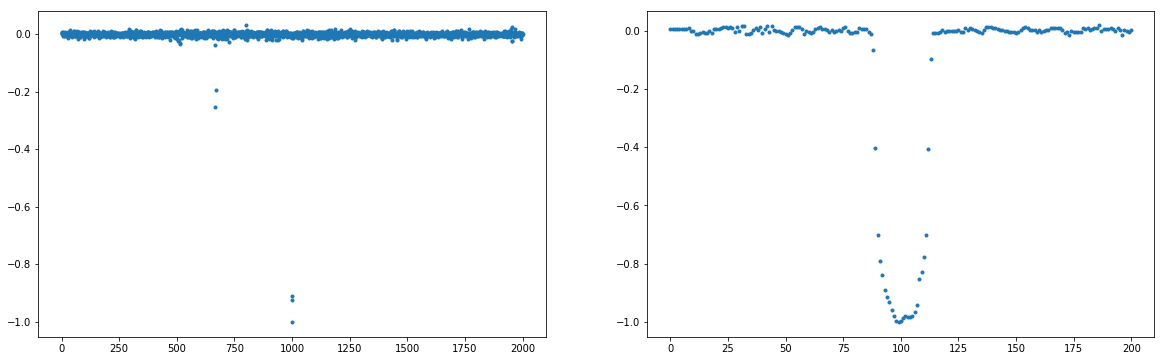

In [6]:
# Plot the global and local views.
global_view = np.array(ex.features.feature["global_view"].float_list.value)
local_view = np.array(ex.features.feature["local_view"].float_list.value)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(global_view, ".")
axes[1].plot(local_view, ".")

In [8]:
ex = find_tce(4743508,1, filenames)

Found 4743508_1 in file /home/idies/workspace/Storage/tdo/planets_ml/tfrecord/train-00007-of-00008


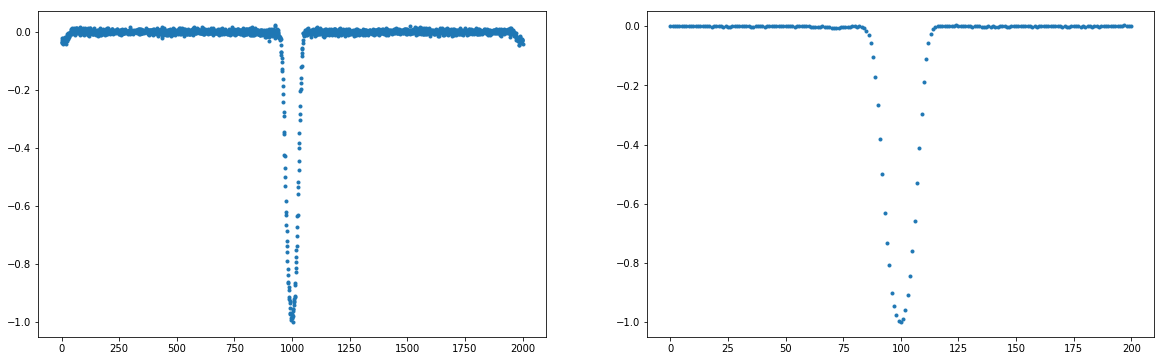

In [9]:
# Plot the global and local views.
global_view = np.array(ex.features.feature["global_view"].float_list.value)
local_view = np.array(ex.features.feature["local_view"].float_list.value)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(global_view, ".")
axes[1].plot(local_view, ".")